# ENRIQUECIMENTO E FEATURE ENGINEERING (modelagem_dim.py)

### 5.1. Justificativa Técnica e Abordagem Profissional

O script `modelagem_dim.py` vai além da criação de dimensões, focando na **Geração de Indicadores Estratégicos** (Feature Engineering). Estes indicadores são essenciais para transformar o volume de transações em informações acionáveis para gestão de preços e demanda.

| Desafio Analítico | Solução Profissional Implementada | Justificativa |
| :--- | :--- | :--- |
| **Identificação de Outliers de Preço** | Cálculo do Z-Score para PMP (Preço Médio Ponderado) por produto e ano. | **Padronização:** Transforma valores monetários brutos em uma métrica de desvio padronizada, ideal para identificar preços atípicos (alto risco). |
| **Risco de Demanda** - Intermitência e Sazonalidade | Cálculo do Risco de Intermitência (Meses Comprados / Período Total). | **Previsibilidade:** Quantifica a instabilidade da demanda, alertando para produtos com histórico de compras irregulares. |
| **Risco de Dependência** | Concentração de Gasto no Fornecedor Principal. | **Governança:** Mede a vulnerabilidade da cadeia de suprimentos, crucial para planejar a diversificação de fornecedores. |
| **Priorização de Ação Gerencial** | Índice de Priorização (50% Risco + 50% Demanda). | **Foco:** Cria uma métrica única que ranqueia produtos por criticidade, direcionando esforços de negociação e gestão para onde o risco financeiro é maior. |

### 5.2. Etapas do Enriquecimento Estratégico

O pipeline de enriquecimento é acionado após a consolidação dos dados e antes da criação das tabelas Fato finais.

| Etapa | Método | Justificativa Técnica |
| :--- | :--- | :--- |
| **1. Estrutura e ID Único** | `gerar_id_pedido` | Cria a Chave Primária (`id_pedido`) para cada linha de transação (hash MD5) e realiza a limpeza de colunas residuais, garantindo a unicidade e integridade da Tabela Fato. |
| **2. Risco de Preço (Z-Score)** | `calcular_zscore_risco` | Calcula o desvio do PMP individual em relação ao PMP médio do mercado (produto/ano). Utiliza a função `transform` do Pandas para cálculo eficiente no grupo sem necessidade de *merge*. |
| **3. Risco de Demanda** | `calcular_risco_intermitencia` | Avalia a estabilidade de compra de um produto, calculando a frequência de meses em que ele foi adquirido em relação ao período total de histórico. |
| **4. Risco de Dependência** | `calcular_concentracao_fornecedor` | Calcula a proporção do gasto total de um produto que está nas mãos do seu principal fornecedor, sinalizando risco de monopólio ou dependência. |
| **5. Priorização** | `calcular_indice_priorizacao` | Normaliza e combina o Risco (Z-Score absoluto) e a Demanda (Gasto Total) em um único índice. Define quais produtos (alto risco e alto valor) devem ser priorizados pela gestão. |
| **6. Radar de Oportunidades** | `gerar_mini_fato_radar_enriquecida` | Cria uma Tabela Fato auxiliar especializada em *benchmarking*. Calcula o **PMP Mediano Dinâmico** (mais robusto que a média) e o Desvio de Oportunidade/Potencial Economia. |

### 5.3. Benefícios e Implicação (Radar de Oportunidades)

A criação da **Tabela Fato Radar** (Mini Fato Enriquecida) é o ponto de contato do *Data Engineering* com a Análise de Oportunidades do Projeto.

| Indicador Analítico | Benefício Estratégico para o Projeto | Implicação na Gestão Pública |
| :--- | :--- | :--- |
| **PMP Benchmark (Mediano)** | O uso da Mediana anula o impacto de *outliers* extremos (preços muito altos ou muito baixos), fornecendo uma referência de preço de mercado mais estável e confiável. | Base factual e inquestionável para negociação de novos contratos e auditoria de compras passadas. |
| **Desvio % Oportunidade** | Quantifica, em porcentagem, o quão acima ou abaixo o PMP pago em uma transação está em relação ao *Benchmark* Mediano do seu contexto (produto/instituição/tempo). | Permite ranquear as compras com maior desvio (positivo ou negativo) para investigação imediata. |
| **Economia por Linha** | Projeta o potencial de economia ao multiplicar o Desvio do Preço pela quantidade comprada. | Cria um valor de negócio tangível (em Reais) que pode ser utilizado para provar o Retorno sobre o Investimento (ROI) da solução analítica. |

### 5.4. Embasamento Legal e Teórico das Métricas

O poder analítico das *features* criadas em `modelagem_dim.py` não é apenas estatístico; ele é diretamente suportado pela legislação brasileira de Compras Públicas, diretrizes de controle e princípios de Governança.

| Métrica Gerada | Fundamentação Legal / Teórica | Implicação Estratégica |
| :--- | :--- | :--- |
| **PMP Mediano Dinâmico** | **IN SEGES/ME Nº 73/2022 (Pesquisa de Preços)** e Acórdãos do TCU que recomendam a **mediana** para afastar *outliers*. | Fornece um **preço de referência de mercado** estatisticamente robusto, crucial para comprovar a **economicidade** da compra, conforme exigido pela Lei nº 14.133/2021 (Art. 23, § 1º). |
| **Z-Score e Desvio % Oportunidade** | **Nova Lei de Licitações (Lei nº 14.133/2021 - Art. 11, VII, b)** e **Governança de Riscos**. | O desvio (Z-Score) sinaliza um **Risco de Preço** alto. É um *Alerta de Governança* que direciona auditoria para compras com potencial sobrepreço ou subpreço, alinhado à gestão de riscos. |
| **Risco de Intermitência** | **Princípio da Eficiência (Constituição Federal)** e literatura de **Supply Chain Management (SCM)** na Saúde. | Quantifica a instabilidade da demanda. Permite planejar a logística e o estoque de forma diferenciada, mitigando o risco de desabastecimento, uma falha de eficiência grave em Saúde Pública. |
| **Concentração de Fornecedor** | **Nova Lei de Licitações (Lei nº 14.133/2021 - Art. 11)** e diretrizes de **Governança Pública** (Gestão de Riscos e Integridade). | Mede a **vulnerabilidade da cadeia de suprimentos**. Altas concentrações exigem planos de contingência, reduzindo o risco de paralisação de fornecimento ou abuso de preços pelo fornecedor dominante. |
| **Índice de Priorização** | **Análise de Portfólio (Matriz Kraljic)**, adaptada para o setor público (Volume vs. Risco). | Combina **Risco** (Z-Score) e **Impacto Financeiro** (Gasto Total) em um único *score*. É a ferramenta gerencial que indica onde o esforço de negociação terá o maior retorno sobre o investimento. |

---

Com esta célula adicionada, a documentação da sua modelagem atinge o nível de **documentação técnica-estratégica**, elevando a qualidade do seu projeto.

**Próximo Passo:** Vamos para a criação das tabelas Fato e Dimensão finais.

#  CARREGANDO TABELA PARA MODELAGEM: compras_consolidado_final.csv

 **TABELA CARREGADA COM SUCESSO!**

 **Total de registros:** 263,562

 **Total de colunas:** 26

###  Informações do Dataset:

,Métrica,Valor
0,Registros,"263,562"
1,Colunas,26
2,Produtos Únicos,"11,143"
3,Fornecedores Únicos,"3,110"
4,Instituições Únicas,761
5,Período,2020-01-01 a 2025-05-15
6,Valor Total,"R$ 75,242,099,052.52"


###  Prévia dos Dados:

,id_pedido,ano_compra,nome_instituicao,cnpj_instituicao,municipio_instituicao,uf,compra,insercao,codigo_br,descricao_catmat,...,cnpj_fabricante,fabricante,qtd_itens_comprados,preco_unitario,preco_total,unidade_fornecimento,pmp_individual,pmp_medio,pmp_desvio_padrao,score_z_risco
0,6482ef28f6d9f1f4ec1b83b6e9b2172b,2020,FUNDO MUNICIPAL DE SAUDE - MUNICIPIO DE ALTO P...,8533932000101,ALTO PARANA,PR,2020-01-01,2020-03-13,243488,"BOLSA VENTILAÇÃO PULMONAR, MATERIAL:BORRACHA, ...",...,73856593000166,"PRATI, DONADUZZI E CIA LTDA",3,6.900,20.7,UNIDADE,6.900,31.925000,35.390694,-0.71
1,df750bba9e0ccdd2c3b126b93af11c0f,2020,MUNICIPIO DE AMERICO BRASILIENSE,43976166000150,AMERICO BRASILIENSE,SP,2020-01-01,2020-10-06,267565,"CARVEDILOL, DOSAGEM:6,25 MG",...,61150447000131,LABORATÓRIOS BALDACCI S/A,36000,0.086,3096.0,COMPRIMIDO,0.086,0.301438,1.257806,-0.17
2,656fc50d1a0a3e9e3f2a74cd25aa04d6,2020,MUNICIPIO DE AMERICO BRASILIENSE,43976166000150,AMERICO BRASILIENSE,SP,2020-01-01,2020-10-06,267567,"CARVEDILOL, DOSAGEM:25 MG",...,61150447000131,LABORATÓRIOS BALDACCI S/A,36000,0.155,5580.0,COMPRIMIDO,0.155,0.934217,4.353897,-0.18


###  Colunas Disponíveis:

**Identificadores:** id_pedido, codigo_br, cnpj_instituicao, cnpj_fornecedor, cnpj_fabricante

**Temporais:** compra, insercao, ano_compra

**Instituição:** nome_instituicao, municipio_instituicao, uf

**Produto:** descricao_catmat, generico, anvisa, unidade_fornecimento

**Compra:** modalidade_compra, tipo_compra

**Financeiro:** qtd_itens_comprados, preco_unitario, preco_total

**Métricas PMP:** pmp_individual, pmp_medio, pmp_desvio_padrao, score_z_risco

##  ANÁLISE DE OCOSIDADE E CONCENTRAÇÃO

,Categoria,Total Cadastrado,Ativos no Período,Ociosos,% Ociosos
0,Produtos,21257,11143,10114,47.6%
1,Instituições,1132,761,371,32.8%
2,Fornecedores,4795,3110,1685,35.1%


###  INSIGHTS ESTRATÉGICOS:

-  **47.6% dos produtos não foram comprados** - oportunidade para revisão de catálogo

-  **32.8% das instituições inativas** - oportunidade para prospecção comercial

-  **35.1% dos fornecedores ociosos** - avaliar parcerias estratégicas

-  **Foco nos ativos:** 11,143 produtos geraram R$ 75,242,099,053Bi em 263,562 transações

-  **Alta concentração de valor** em poucos produtos/fornecedores ativos - confirme com seu Pareto no Dashboard

#  INICIANDO MODELAGEM COMPLETA

###  Etapa 1: Cálculo do Z-Score de Risco

 **Z-Score já calculado na coluna específica**

###  Etapa 2: Risco de Intermitência

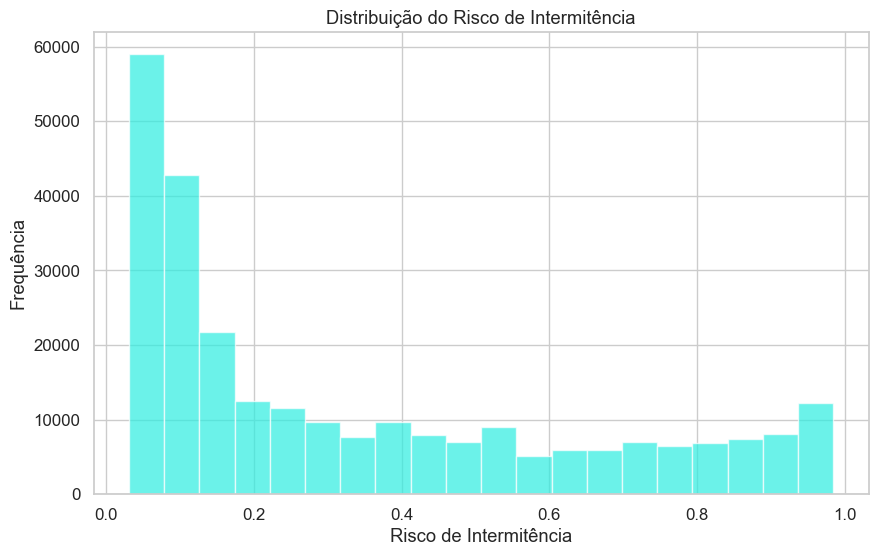

**Risco médio:** 33.85%

 **Risco de Intermitência calculado!**

### 🏭 Etapa 3: Concentração de Fornecedor

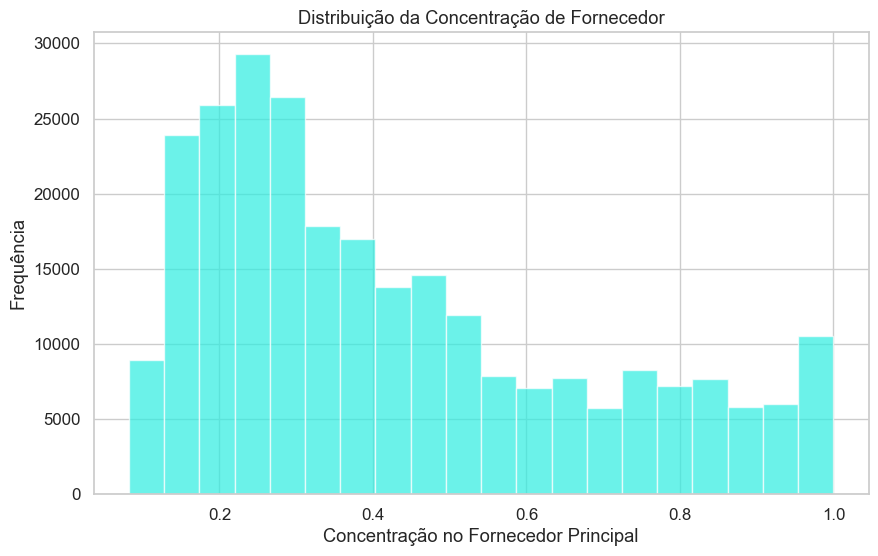

**Produtos com concentração >80%:** 33392

 **Concentração de Fornecedor calculada!**

###  Etapa 4: Índice de Priorização

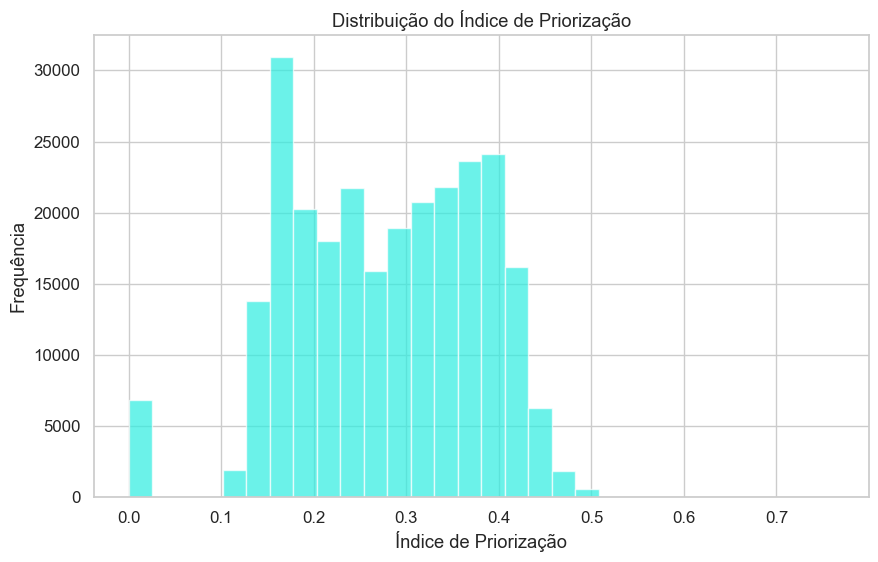

**Top 10 produtos prioritários:**

- 439678: 0.7616

- 269833: 0.5001

- 403959: 0.4974

- 442145: 0.4965

- 439799: 0.4923

- 397494: 0.4920

- 400563: 0.4885

- 425356: 0.4852

- 448808: 0.4841

- 364040: 0.4832

 **Índice de Priorização calculado!**

###  RESUMO FINAL

,Métrica,Valor
0,Registros,"263,562"
1,Produtos,"11,143"
2,Z-Score Médio,-0.00
3,Risco Intermitência Médio,33.85%
4,Concentração Fornecedor Médio,42.88%
5,Índice Priorização Médio,0.2768


###  Dados Modelados (amostra):

,codigo_br,compra,preco_total,score_z_risco,Risco_Intermitencia,%_Gasto_Unico_Forn,indice_priorizacao
0,243488,2020-01-01,20.70,-0.71,0.969231,0.985081,0.3924
1,267565,2020-01-01,3096.00,-0.17,0.092308,0.964961,0.1703
2,267567,2020-01-01,5580.00,-0.18,0.107692,0.175076,0.1793
3,267663,2020-01-01,18.11,2.30,0.076923,0.293446,0.1717
4,268859,2020-01-01,32.16,1.93,0.276923,0.373427,0.2641
5,269962,2020-01-01,19.28,7.09,0.153846,0.201983,0.2189
6,270120,2020-01-01,43.28,3.69,0.076923,0.252473,0.2398
7,270472,2020-01-01,51.35,1.09,0.861538,0.806370,0.4434
8,270907,2020-01-01,23.67,0.95,0.153846,0.242902,0.2111
9,271356,2020-01-01,28.98,3.88,0.138462,0.862032,0.2283


### 💾 Salvando resultados...

✅ **Dados modelados salvos em:** C:\Users\debor\OneDrive\Github\compras_medicamentos_sus\data\outputs\compras_modeladas_final.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown




# Configuração para visualizações

# LINHAS NOVAS (colocar):
sns.set_theme(style='whitegrid', font_scale=1.1)
CORES_NOVAS = ['#2dede0', '#25c9bd', '#1fa59a', '#ff6b6b', '#4ecdc4']
sns.set_palette(CORES_NOVAS)
# ==============================================================================
# CARREGAR A TABELA: compras_consolidado_final.csv
# ==============================================================================

display(Markdown("#  CARREGANDO TABELA PARA MODELAGEM: compras_consolidado_final.csv"))

# Usando o caminho correto que seu main.py usa
caminho_correto = r'C:\Users\debor\OneDrive\Github\compras_medicamentos_sus\data\outputs\compras_consolidado_final.csv'

try:
    # Carregar com separador ponto e vírgula (baseado nas suas colunas)
    df = pd.read_csv(caminho_correto, sep=';')
    
    display(Markdown(f" **TABELA CARREGADA COM SUCESSO!**"))
    display(Markdown(f" **Total de registros:** {len(df):,}"))
    display(Markdown(f" **Total de colunas:** {len(df.columns)}"))
    
    # Converter coluna de data
    if 'compra' in df.columns:
        df['compra'] = pd.to_datetime(df['compra'], errors='coerce')
    
    # Mostrar informações
    display(Markdown("###  Informações do Dataset:"))
    
    info_data = [
        ['Registros', f"{len(df):,}"],
        ['Colunas', f"{len(df.columns)}"],
        ['Produtos Únicos', f"{df['codigo_br'].nunique():,}"],
        ['Fornecedores Únicos', f"{df['cnpj_fornecedor'].nunique():,}"],
        ['Instituições Únicas', f"{df['cnpj_instituicao'].nunique():,}"],
        ['Período', f"{df['compra'].min().strftime('%Y-%m-%d')} a {df['compra'].max().strftime('%Y-%m-%d')}"],
        ['Valor Total', f"R$ {df['preco_total'].sum():,.2f}"]
    ]
    
    info_df = pd.DataFrame(info_data, columns=['Métrica', 'Valor'])
    display(info_df)
    
    # Mostrar prévia
    display(Markdown("###  Prévia dos Dados:"))
    display(df.head(3))
    
    # Verificar colunas
    display(Markdown("###  Colunas Disponíveis:"))
    colunas_grupos = {
        'Identificadores': ['id_pedido', 'codigo_br', 'cnpj_instituicao', 'cnpj_fornecedor', 'cnpj_fabricante'],
        'Temporais': ['compra', 'insercao', 'ano_compra'],
        'Instituição': ['nome_instituicao', 'municipio_instituicao', 'uf'],
        'Produto': ['descricao_catmat', 'generico', 'anvisa', 'unidade_fornecimento'],
        'Compra': ['modalidade_compra', 'tipo_compra'],
        'Financeiro': ['qtd_itens_comprados', 'preco_unitario', 'preco_total'],
        'Métricas PMP': ['pmp_individual', 'pmp_medio', 'pmp_desvio_padrao', 'score_z_risco']
    }
    
    for grupo, colunas in colunas_grupos.items():
        colunas_presentes = [col for col in colunas if col in df.columns]
        if colunas_presentes:
            display(Markdown(f"**{grupo}:** {', '.join(colunas_presentes)}"))

except Exception as e:
    display(Markdown(f" **Erro ao carregar:** {e}"))
    df = None

# ==============================================================================
# FUNÇÕES DE MODELAGEM COMPLETA
# ==============================================================================

if df is not None:

    def calcular_zscore_risco(df: pd.DataFrame, mostrar_resultados: bool = True) -> pd.DataFrame:
        """Calcula Z-Score de risco - versão otimizada"""
        display(Markdown("###  Etapa 1: Cálculo do Z-Score de Risco"))
        
        # Verificar se já não existe
        if 'score_z_risco' in df.columns and not df['score_z_risco'].isna().all():
            display(Markdown(" **Z-Score já calculado na coluna específica**"))
            return df
        
        df['ano_compra'] = df['compra'].dt.year
        
        # Calcular PMP individual se não existir
        if 'pmp_individual' not in df.columns:
            df['pmp_individual'] = np.where(
                df['qtd_itens_comprados'] > 0,
                df['preco_total'] / df['qtd_itens_comprados'],
                0
            )
        
        # Calcular média e desvio padrão
        colunas_agrupamento = ['codigo_br', 'ano_compra']
        df['pmp_medio'] = df.groupby(colunas_agrupamento)['pmp_individual'].transform('mean')
        df['pmp_desvio_padrao'] = df.groupby(colunas_agrupamento)['pmp_individual'].transform('std').fillna(0)
        
        # Calcular Z-Score
        df['score_z_risco'] = np.where(
            df['pmp_desvio_padrao'] > 0,
            (df['pmp_individual'] - df['pmp_medio']) / df['pmp_desvio_padrao'],
            0
        ).round(2)
        
        if mostrar_resultados:
            fig, axes = plt.subplots(1, 2, figsize=(15, 5))
            
            data_clean = df['score_z_risco'].replace([np.inf, -np.inf], np.nan).dropna()
            axes[0].hist(data_clean, bins=50, alpha=0.7, edgecolor='black')
            axes[0].set_xlabel('Z-Score')
            axes[0].set_ylabel('Frequência')
            axes[0].set_title('Distribuição do Z-Score')
            
            axes[1].boxplot(data_clean)
            axes[1].set_ylabel('Z-Score')
            axes[1].set_title('Boxplot do Z-Score')
            plt.tight_layout()
            plt.show()
            
            stats = df['score_z_risco'].describe()
            display(Markdown(f"**Estatísticas Z-Score:** Média={stats['mean']:.2f}, Std={stats['std']:.2f}"))
        
        display(Markdown(" **Z-Score calculado na coluna!**"))
        return df

    def calcular_risco_intermitencia(df: pd.DataFrame, mostrar_resultados: bool = True) -> pd.DataFrame:
        """Calcula risco de intermitência"""
        display(Markdown("###  Etapa 2: Risco de Intermitência"))
        
        if 'Risco_Intermitencia' in df.columns:
            display(Markdown(" **Risco de Intermitência já calculado**"))
            return df
        
        df['mes_compra'] = df['compra'].dt.to_period('M')
        
        # Usar código_br como id_produto
        df['id_produto'] = df['codigo_br']
        
        intermitencia = df.groupby('id_produto')['mes_compra'].nunique().reset_index()
        intermitencia.rename(columns={'mes_compra': 'Meses_Comprados_Historico'}, inplace=True)
        
        mes_min = df['mes_compra'].min()
        mes_max = df['mes_compra'].max()
        periodo_total = (mes_max.year - mes_min.year) * 12 + mes_max.month - mes_min.month + 1
        
        intermitencia['Risco_Intermitencia'] = 1 - (intermitencia['Meses_Comprados_Historico'] / periodo_total)
        
        df = df.merge(intermitencia, on='id_produto', how='left')
        df.drop(columns=['mes_compra'], inplace=True, errors='ignore')
        
        if mostrar_resultados:
            fig, ax = plt.subplots(figsize=(10, 6))
            df['Risco_Intermitencia'].hist(bins=20, alpha=0.7, ax=ax)
            ax.set_xlabel('Risco de Intermitência')
            ax.set_ylabel('Frequência')
            ax.set_title('Distribuição do Risco de Intermitência')
            plt.show()
            
            display(Markdown(f"**Risco médio:** {df['Risco_Intermitencia'].mean():.2%}"))
        
        display(Markdown(" **Risco de Intermitência calculado!**"))
        return df

    def calcular_concentracao_fornecedor(df: pd.DataFrame, mostrar_resultados: bool = True) -> pd.DataFrame:
        """Calcula concentração de fornecedor"""
        display(Markdown("### 🏭 Etapa 3: Concentração de Fornecedor"))
        
        if '%_Gasto_Unico_Forn' in df.columns:
            display(Markdown(" **Concentração de Fornecedor já calculada**"))
            return df
        
        # Usar cnpj_fornecedor como id_fornecedor
        df['id_fornecedor'] = df['cnpj_fornecedor']
        df['id_produto'] = df['codigo_br']
        
        gasto_total = df.groupby('id_produto')['preco_total'].sum().reset_index(name='Gasto_Total_Produto')
        gasto_fornecedor = df.groupby(['id_produto', 'id_fornecedor'])['preco_total'].sum().reset_index()
        
        idx_max = gasto_fornecedor.groupby('id_produto')['preco_total'].idxmax()
        fornecedor_principal = gasto_fornecedor.loc[idx_max, ['id_produto', 'preco_total']].rename(
            columns={'preco_total': 'Gasto_Principal'}
        )
        
        concentracao = gasto_total.merge(fornecedor_principal, on='id_produto')
        concentracao['%_Gasto_Unico_Forn'] = concentracao['Gasto_Principal'] / concentracao['Gasto_Total_Produto']
        
        df = df.merge(concentracao[['id_produto', '%_Gasto_Unico_Forn']], on='id_produto', how='left')
        
        if mostrar_resultados:
            fig, ax = plt.subplots(figsize=(10, 6))
            df['%_Gasto_Unico_Forn'].hist(bins=20, alpha=0.7, ax=ax)
            ax.set_xlabel('Concentração no Fornecedor Principal')
            ax.set_ylabel('Frequência')
            ax.set_title('Distribuição da Concentração de Fornecedor')
            plt.show()
            
            criticos = (df['%_Gasto_Unico_Forn'] > 0.8).sum()
            display(Markdown(f"**Produtos com concentração >80%:** {criticos}"))
        
        display(Markdown(" **Concentração de Fornecedor calculada!**"))
        return df

    def calcular_indice_priorizacao(df: pd.DataFrame, mostrar_resultados: bool = True) -> pd.DataFrame:
        """Calcula índice de priorização"""
        display(Markdown("###  Etapa 4: Índice de Priorização"))
        
        if 'indice_priorizacao' in df.columns:
            display(Markdown(" **Índice de Priorização já calculado**"))
            return df
        
        df['id_produto'] = df['codigo_br']
        
        # Agrupar por produto
        produto_metrics = df.groupby('id_produto').agg(
            risco_absoluto=('score_z_risco', lambda x: np.abs(x).mean()),
            demanda_total=('preco_total', 'sum')
        ).reset_index()
        
        # Normalizar
        produto_metrics['risco_norm'] = (produto_metrics['risco_absoluto'] - produto_metrics['risco_absoluto'].min()) / (produto_metrics['risco_absoluto'].max() - produto_metrics['risco_absoluto'].min())
        produto_metrics['demanda_norm'] = (produto_metrics['demanda_total'] - produto_metrics['demanda_total'].min()) / (produto_metrics['demanda_total'].max() - produto_metrics['demanda_total'].min())
        
        # Calcular índice
        produto_metrics['indice_priorizacao'] = (produto_metrics['risco_norm'] * 0.5 + produto_metrics['demanda_norm'] * 0.5).round(4)
        
        df = df.merge(produto_metrics[['id_produto', 'indice_priorizacao', 'demanda_total']].rename(
            columns={'demanda_total': 'demanda_valor'}), on='id_produto', how='left')
        
        if mostrar_resultados:
            fig, ax = plt.subplots(figsize=(10, 6))
            df['indice_priorizacao'].hist(bins=30, alpha=0.7, ax=ax)
            ax.set_xlabel('Índice de Priorização')
            ax.set_ylabel('Frequência')
            ax.set_title('Distribuição do Índice de Priorização')
            plt.show()
            
            top_10 = df.groupby('id_produto')['indice_priorizacao'].first().nlargest(10)
            display(Markdown("**Top 10 produtos prioritários:**"))
            for produto, indice in top_10.items():
                display(Markdown(f"- {produto}: {indice:.4f}"))
        
        display(Markdown(" **Índice de Priorização calculado!**"))
        return df

    def executar_modelagem_completa(df: pd.DataFrame) -> pd.DataFrame:
        """Executa toda a modelagem"""
        display(Markdown("#  INICIANDO MODELAGEM COMPLETA"))
        
        df_resultado = df.copy()
        
        # Aplicar todas as etapas
        df_resultado = calcular_zscore_risco(df_resultado)
        df_resultado = calcular_risco_intermitencia(df_resultado)
        df_resultado = calcular_concentracao_fornecedor(df_resultado)
        df_resultado = calcular_indice_priorizacao(df_resultado)
        
        # Resumo final
        display(Markdown("###  RESUMO FINAL"))
        
        metricas = [
            ['Registros', f"{len(df_resultado):,}"],
            ['Produtos', f"{df_resultado['codigo_br'].nunique():,}"],
            ['Z-Score Médio', f"{df_resultado['score_z_risco'].mean():.2f}"],
            ['Risco Intermitência Médio', f"{df_resultado['Risco_Intermitencia'].mean():.2%}"],
            ['Concentração Fornecedor Médio', f"{df_resultado['%_Gasto_Unico_Forn'].mean():.2%}"],
            ['Índice Priorização Médio', f"{df_resultado['indice_priorizacao'].mean():.4f}"]
        ]
        
        resumo_df = pd.DataFrame(metricas, columns=['Métrica', 'Valor'])
        display(resumo_df)
        
        display(Markdown("###  Dados Modelados (amostra):"))
        colunas_novas = ['score_z_risco', 'Risco_Intermitencia', '%_Gasto_Unico_Forn', 'indice_priorizacao']
        colunas_base = ['codigo_br', 'compra', 'preco_total']
        colunas_mostrar = [col for col in colunas_base + colunas_novas if col in df_resultado.columns]
        display(df_resultado[colunas_mostrar].head(10))
        
        return df_resultado
    
            
    display(Markdown("##  ANÁLISE DE OCOSIDADE E CONCENTRAÇÃO"))

    # Calcular dinamicamente a partir dos dados
    total_produtos_cadastrados = 21257  # Você pode ajustar esses valores
    total_instituicoes_cadastradas = 1132
    total_fornecedores_cadastrados = 4795

    produtos_ativos = df_final['codigo_br'].nunique()
    instituicoes_ativas = df_final['cnpj_instituicao'].nunique() 
    fornecedores_ativos = df_final['cnpj_fornecedor'].nunique()

    analise_ociosidade = pd.DataFrame({
        'Categoria': ['Produtos', 'Instituições', 'Fornecedores'],
        'Total Cadastrado': [total_produtos_cadastrados, total_instituicoes_cadastradas, total_fornecedores_cadastrados],
        'Ativos no Período': [produtos_ativos, instituicoes_ativas, fornecedores_ativos],
        'Ociosos': [
            total_produtos_cadastrados - produtos_ativos,
            total_instituicoes_cadastradas - instituicoes_ativas,
            total_fornecedores_cadastrados - fornecedores_ativos
        ],
        '% Ociosos': [
            f"{((total_produtos_cadastrados - produtos_ativos)/total_produtos_cadastrados)*100:.1f}%",
            f"{((total_instituicoes_cadastradas - instituicoes_ativas)/total_instituicoes_cadastradas)*100:.1f}%", 
            f"{((total_fornecedores_cadastrados - fornecedores_ativos)/total_fornecedores_cadastrados)*100:.1f}%"
        ]
    })

    display(analise_ociosidade)

    display(Markdown("###  INSIGHTS ESTRATÉGICOS:"))

    insights = [
        f" **{analise_ociosidade.iloc[0]['% Ociosos']} dos produtos não foram comprados** - oportunidade para revisão de catálogo",
        f" **{analise_ociosidade.iloc[1]['% Ociosos']} das instituições inativas** - oportunidade para prospecção comercial", 
        f" **{analise_ociosidade.iloc[2]['% Ociosos']} dos fornecedores ociosos** - avaliar parcerias estratégicas",
        f" **Foco nos ativos:** {produtos_ativos:,} produtos geraram R$ {df_final['preco_total'].sum():,.0f}Bi em {len(df_final):,} transações",
        f" **Alta concentração de valor** em poucos produtos/fornecedores ativos - confirme com seu Pareto no Dashboard"
    ]

    for insight in insights:
        display(Markdown(f"- {insight}"))
    
   
    # Executar modelagem
    df_final = executar_modelagem_completa(df)
    
    # Salvar resultado
    display(Markdown("### Salvando resultados..."))
    caminho_saida = r'C:\Users\debor\OneDrive\Github\compras_medicamentos_sus\data\outputs\compras_modeladas_final.csv'
    df_final.to_csv(caminho_saida, sep=';', index=False)
    display(Markdown(f"✅ **Dados modelados salvos em:** {caminho_saida}"))

else:
    display(Markdown("❌ **Não foi possível carregar os dados para modelagem.**"))